In [ ]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# XGBoost and other models
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Visualization libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1oxd_iRWSyRRKvJs03UN5EJMKJY-s8slBgl4eWJLNJaM/export?format=csv')
df.head()


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Country,0
Age,0
Gender,0
Cancer_Stage,0
Tumor_Size_mm,0
Family_History,0
Smoking_History,0
Alcohol_Consumption,0
Obesity_BMI,0


In [ ]:
df.shape

(167497, 28)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [ ]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [ ]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

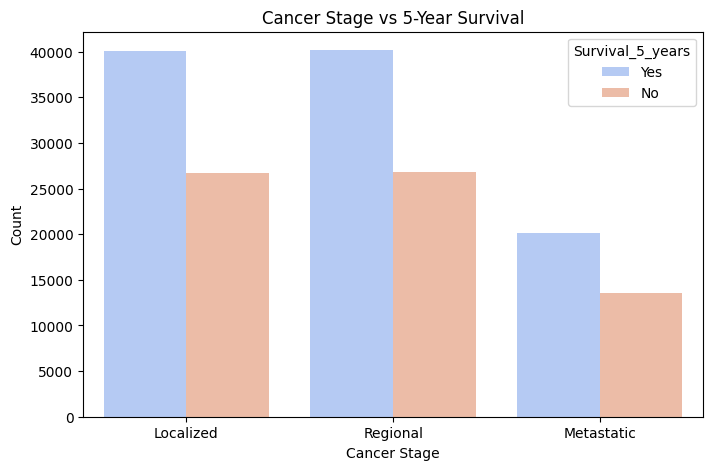

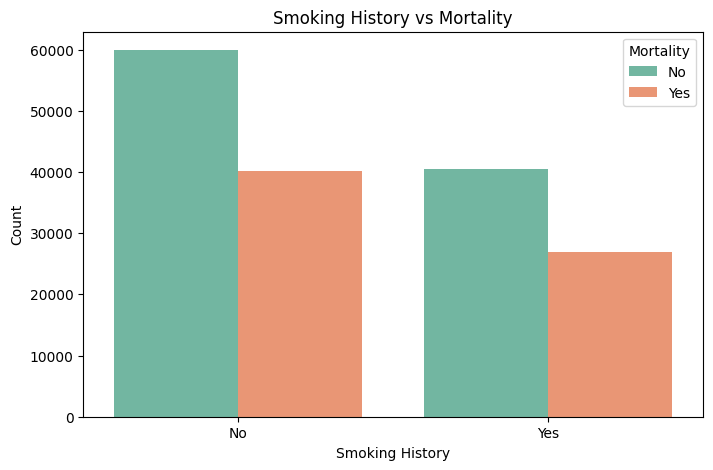

In [ ]:
# Cancer Stage vs Survival 5 years
plt.figure(figsize=(8, 5))
sns.countplot(x='Cancer_Stage', hue='Survival_5_years', data=df, palette="coolwarm")
plt.title("Cancer Stage vs 5-Year Survival")
plt.xlabel("Cancer Stage")
plt.ylabel("Count")
plt.show()

# Smoking History vs Mortality
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking_History', hue='Mortality', data=df, palette="Set2")
plt.title("Smoking History vs Mortality")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.show()


<ipython-input-11-23cbebe744f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cancer_Stage', y='Tumor_Size_mm', data=df, palette="coolwarm")


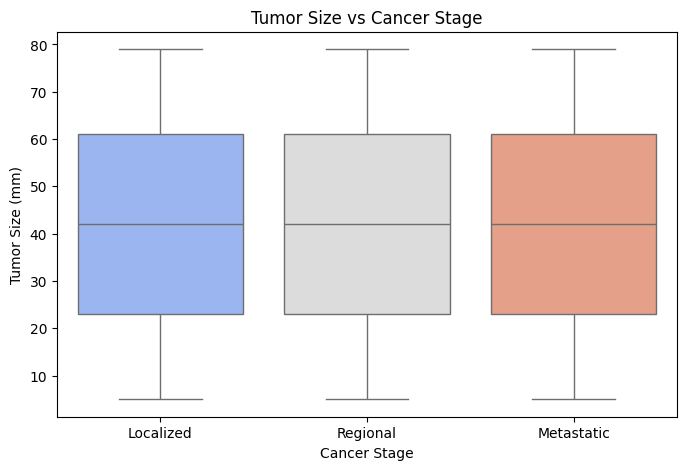

<ipython-input-11-23cbebe744f5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survival_Prediction', y='Healthcare_Costs', data=df, palette="Set2")


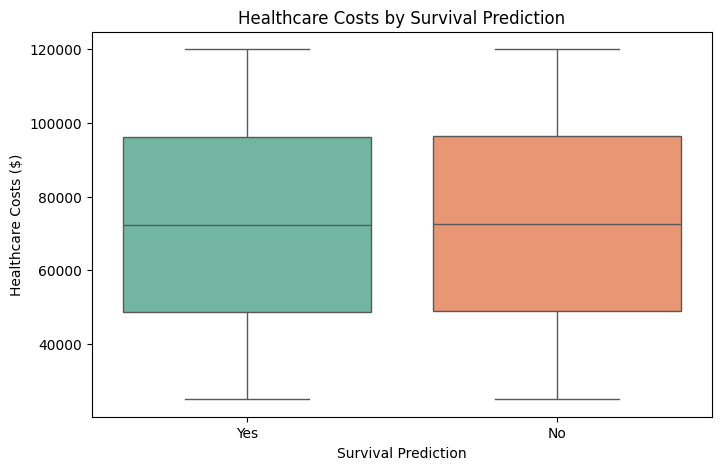

In [ ]:
# Boxplot: Tumor Size vs Cancer Stage
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cancer_Stage', y='Tumor_Size_mm', data=df, palette="coolwarm")
plt.title("Tumor Size vs Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (mm)")
plt.show()

# Healthcare Cost distribution by Survival Prediction
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survival_Prediction', y='Healthcare_Costs', data=df, palette="Set2")
plt.title("Healthcare Costs by Survival Prediction")
plt.xlabel("Survival Prediction")
plt.ylabel("Healthcare Costs ($)")
plt.show()


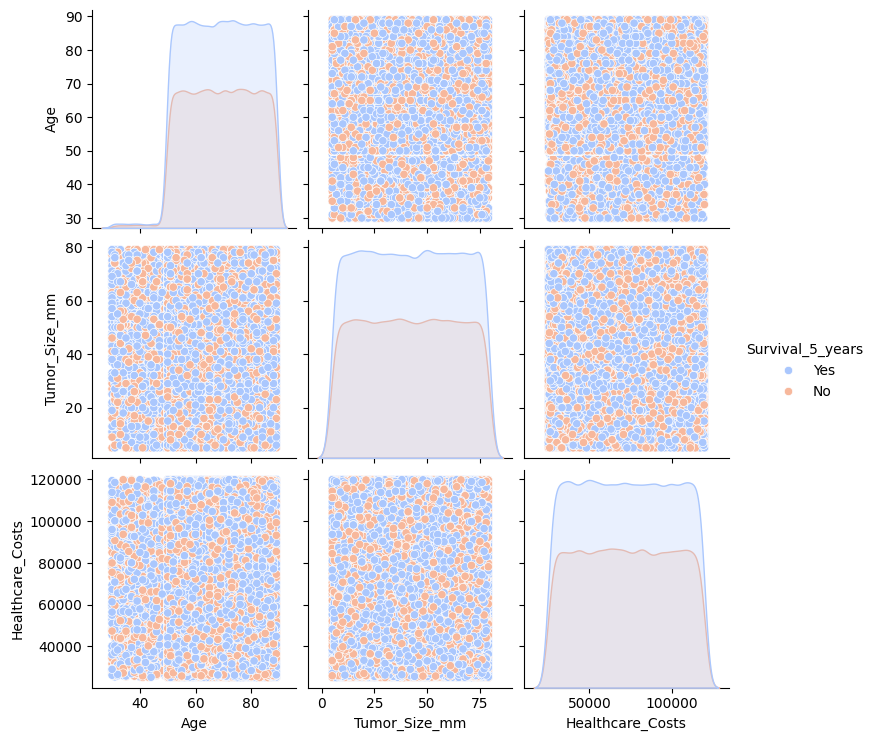

In [ ]:
# Selecting important features
selected_features = ['Age', 'Tumor_Size_mm', 'Healthcare_Costs', 'Survival_5_years']

# Pairplot
sns.pairplot(df[selected_features], hue="Survival_5_years", palette="coolwarm")
plt.show()


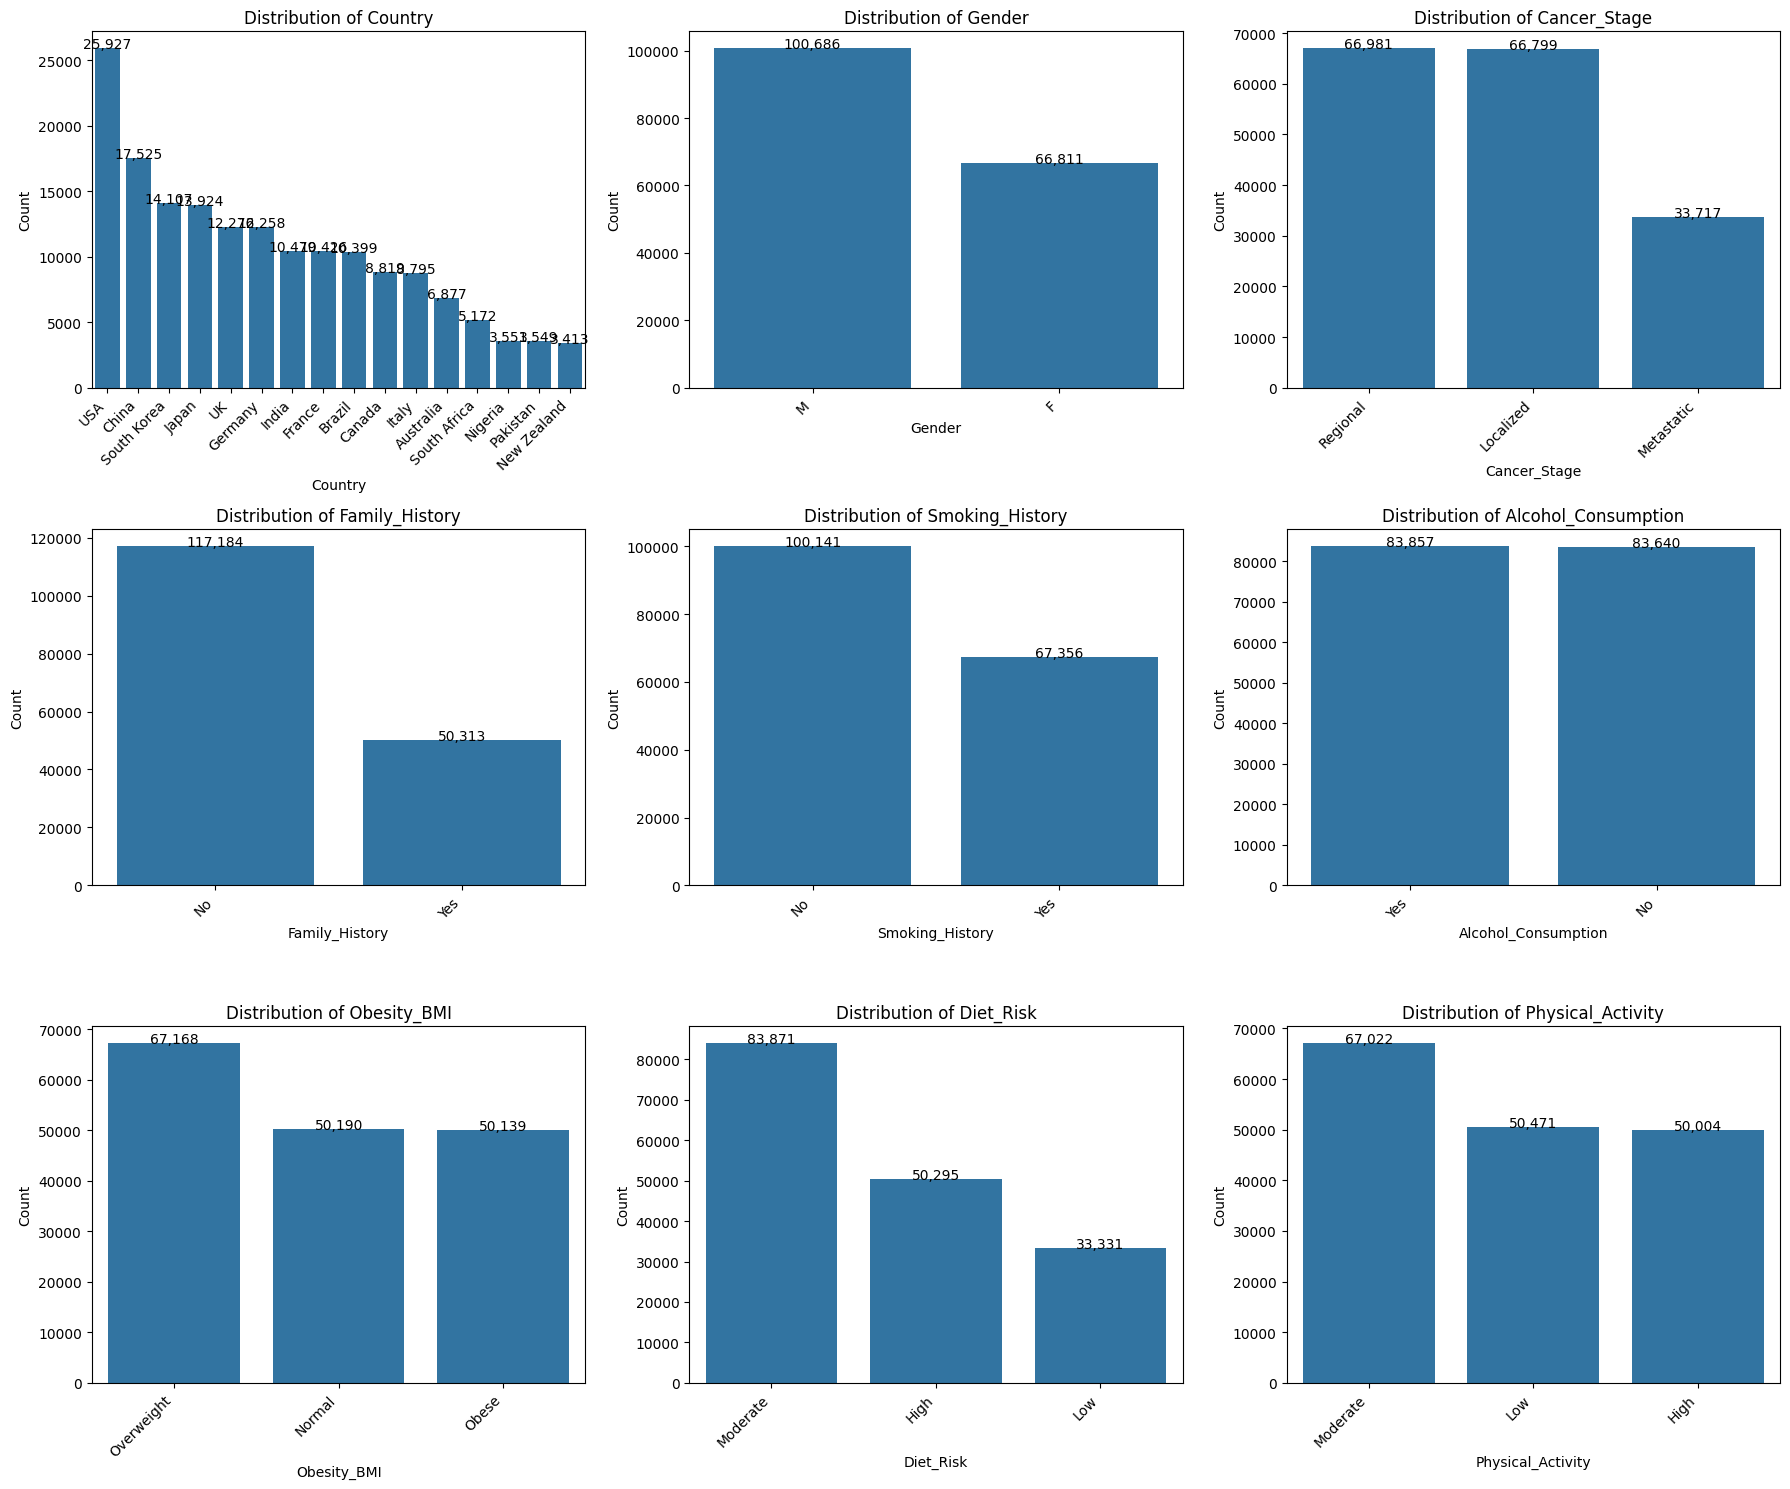

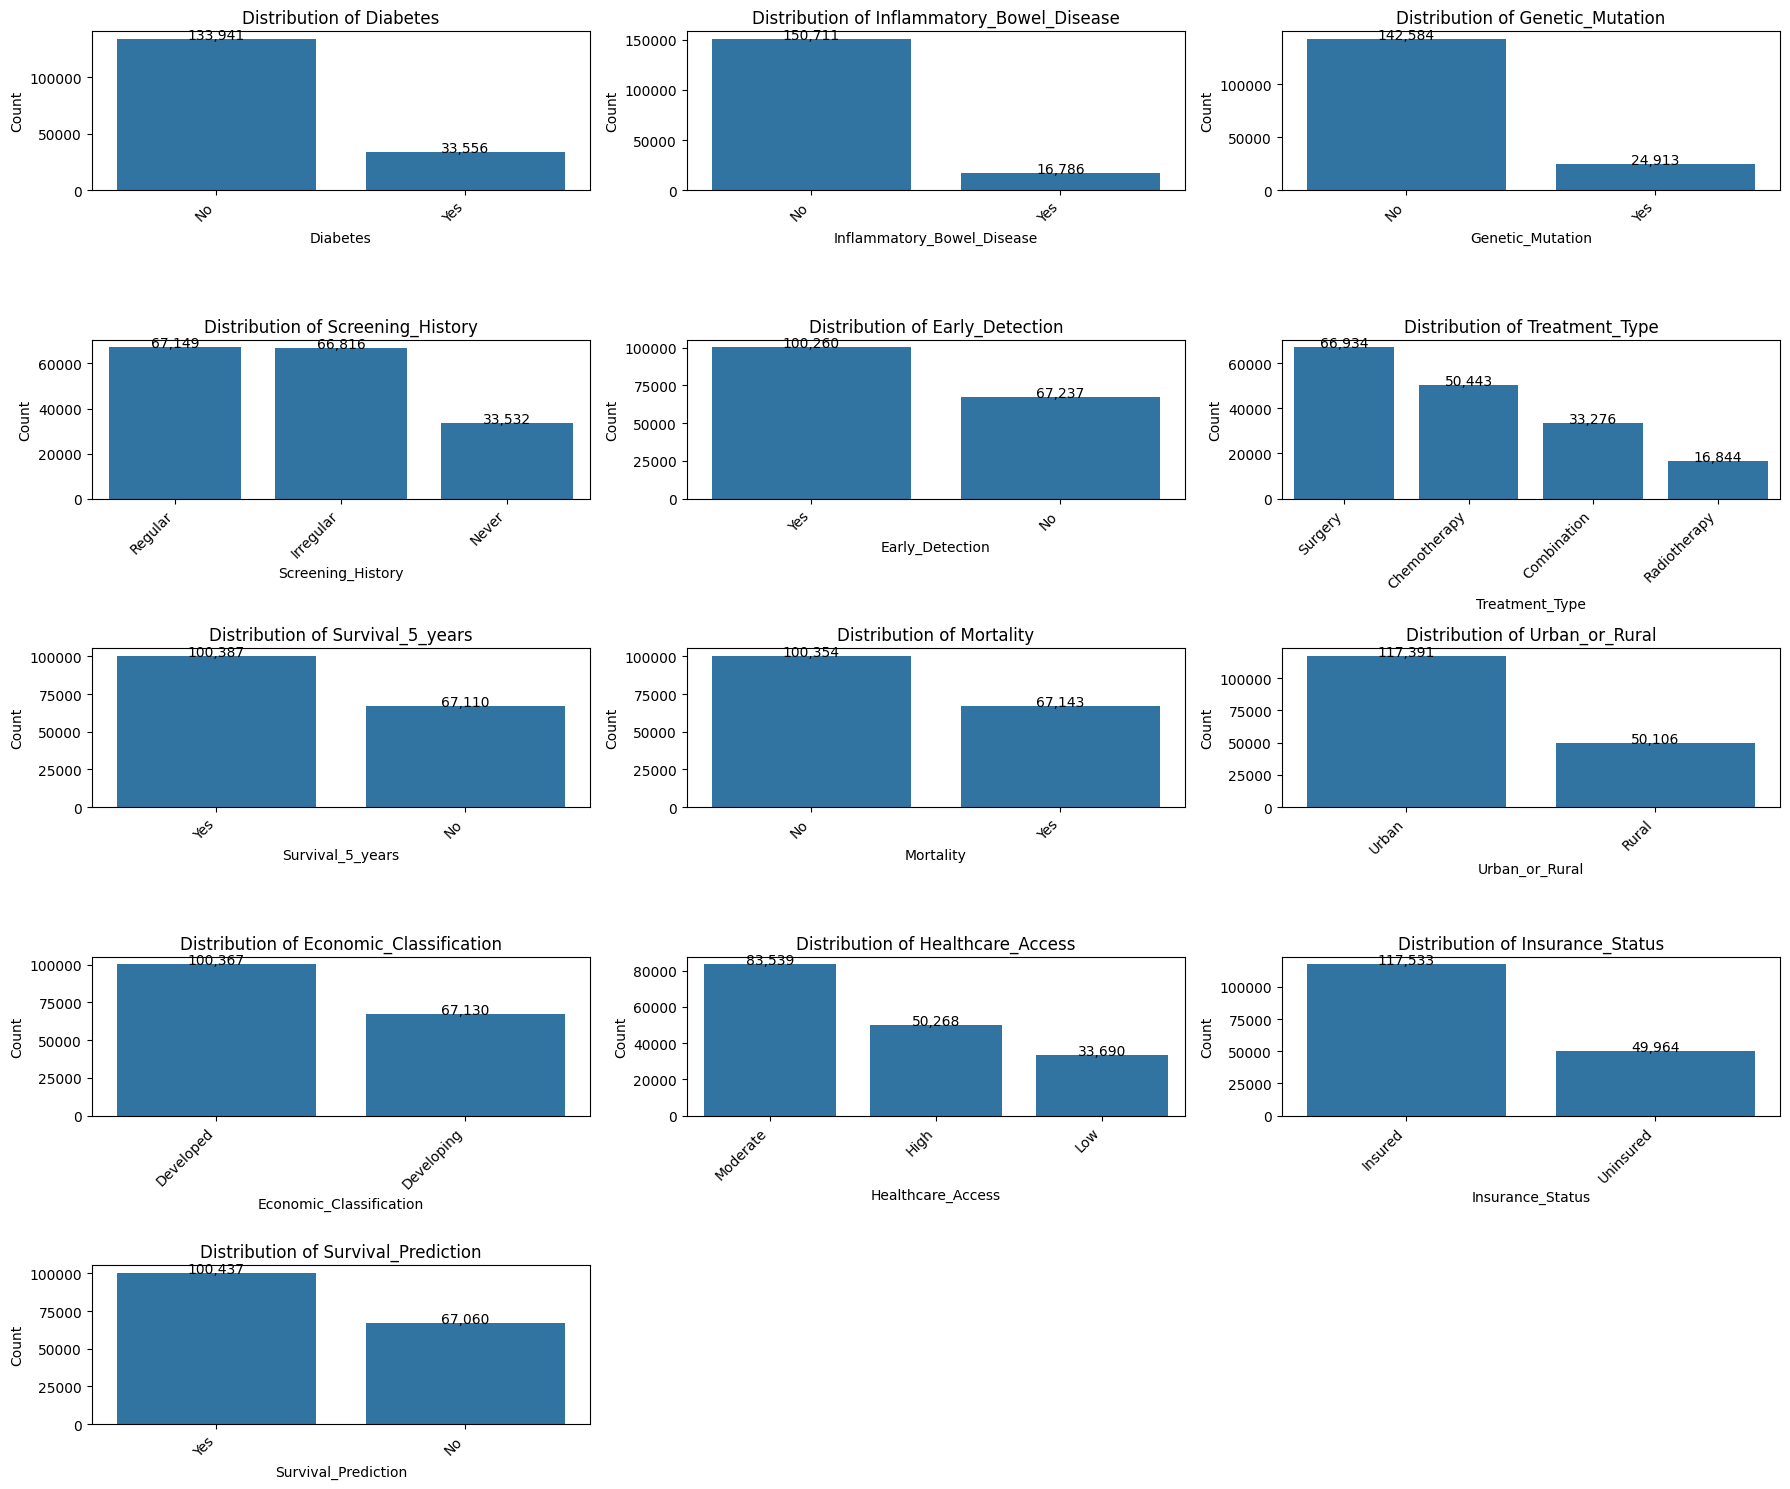

In [ ]:
def plot_categorical_counts(dataframe, columns, figsize=(18, 15)):
    plt.figure(figsize=figsize)

    # Calculate number of rows and columns for subplots
    n_cols = 3
    n_rows = (len(columns) + n_cols - 1) // n_cols

    for i, column in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)

        # Get value counts and sort by count
        value_counts = dataframe[column].value_counts().sort_values(ascending=False)

        # Create a bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values)

        # Add labels and title
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        # Add count labels on top of bars
        for j, v in enumerate(value_counts.values):
            plt.text(j, v + 0.1, f'{v:,}', ha='center')

    plt.tight_layout()
    plt.show()

# Select categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns = [col for col in categorical_columns if col != 'Patient_ID']  # Exclude Patient_ID

# Plot the distribution of categorical variables
plot_categorical_counts(df, categorical_columns[:9])  # First set of categorical variables
plot_categorical_counts(df, categorical_columns[9:])  # Second set of categorical variables

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

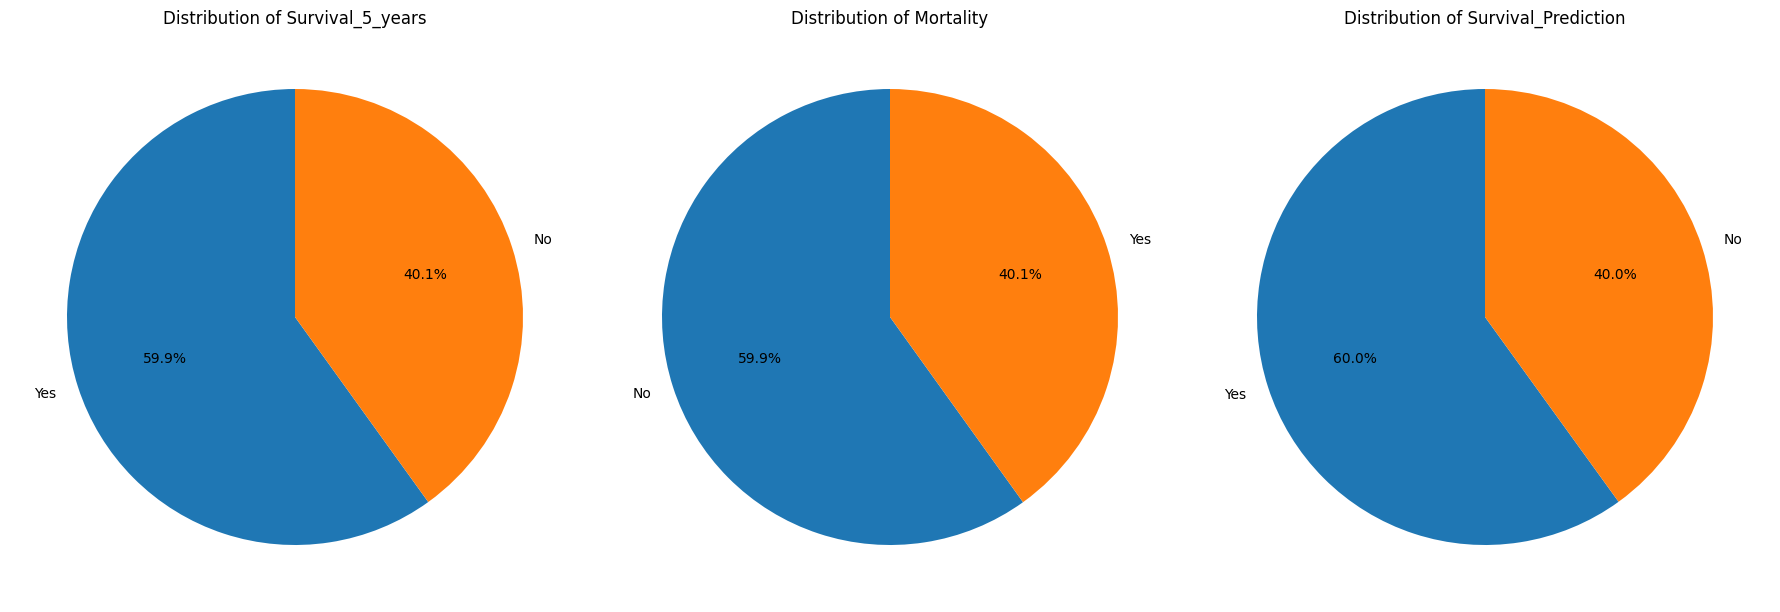

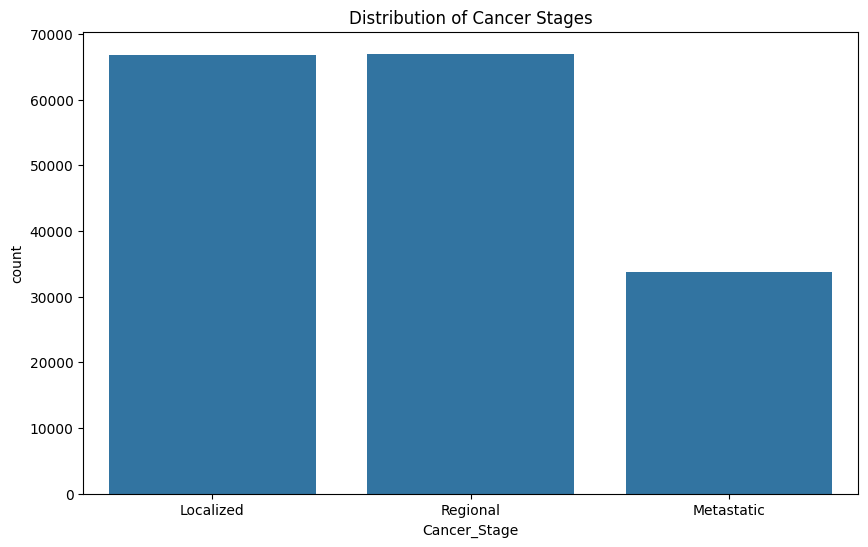

<Figure size 1200x800 with 0 Axes>

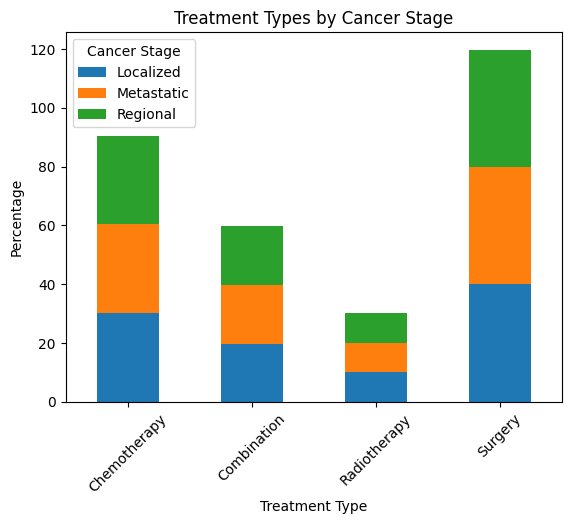

In [ ]:
# Analyze target variable distribution
target_vars = ['Survival_5_years', 'Mortality', 'Survival_Prediction']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, var in enumerate(target_vars):
    counts = df[var].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# Look at Cancer Stage distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cancer_Stage', data=df)
plt.title('Distribution of Cancer Stages')
plt.xticks(rotation=0)
plt.show()

# Treatment types across cancer stages
plt.figure(figsize=(12, 8))
treatment_stage = pd.crosstab(df['Treatment_Type'], df['Cancer_Stage'])
treatment_stage_pct = treatment_stage.div(treatment_stage.sum(axis=0), axis=1) * 100

treatment_stage_pct.plot(kind='bar', stacked=True)
plt.title('Treatment Types by Cancer Stage')
plt.xlabel('Treatment Type')
plt.ylabel('Percentage')
plt.legend(title='Cancer Stage')
plt.xticks(rotation=45)
plt.show()

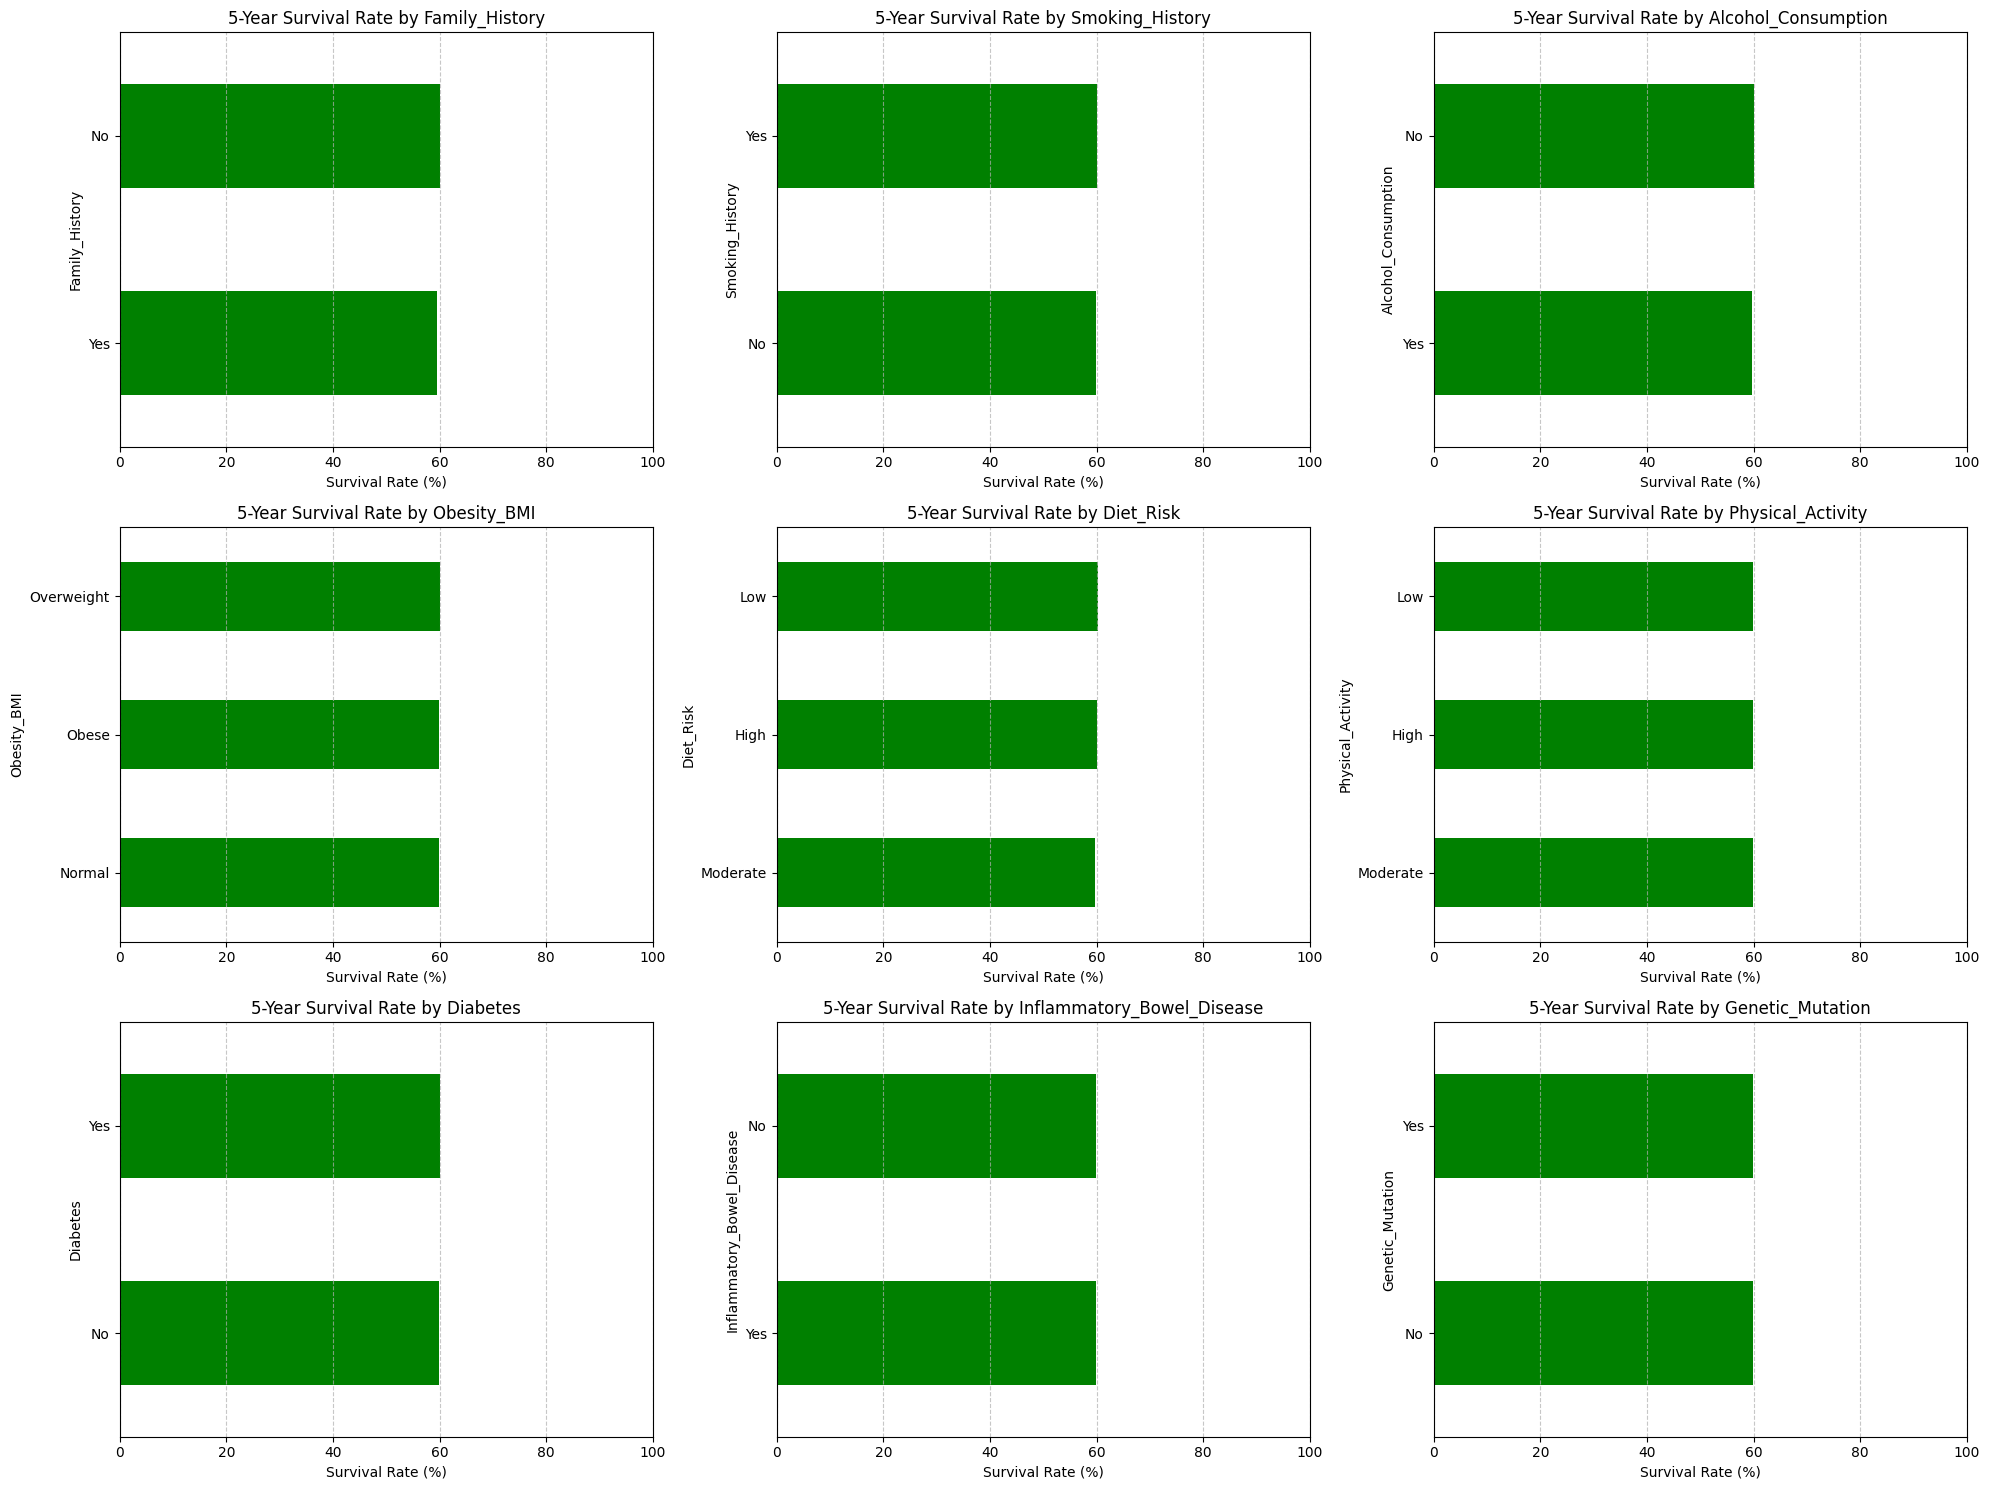

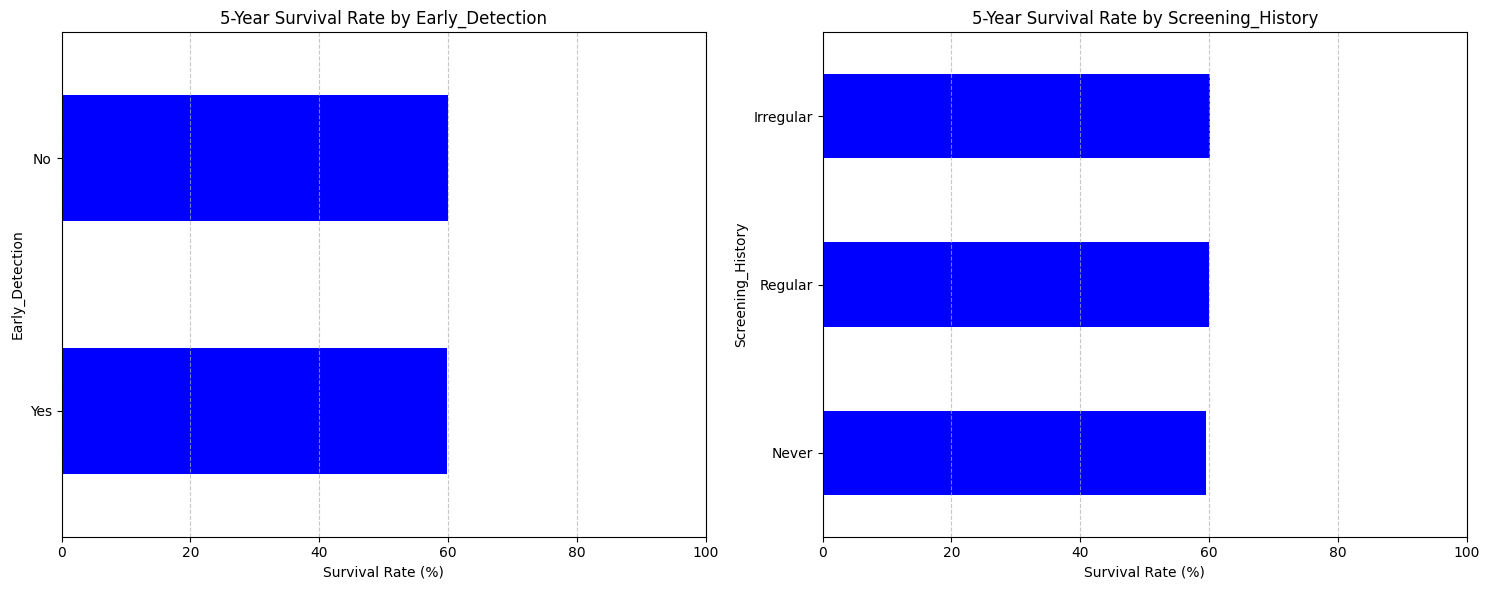

<Figure size 1500x800 with 0 Axes>

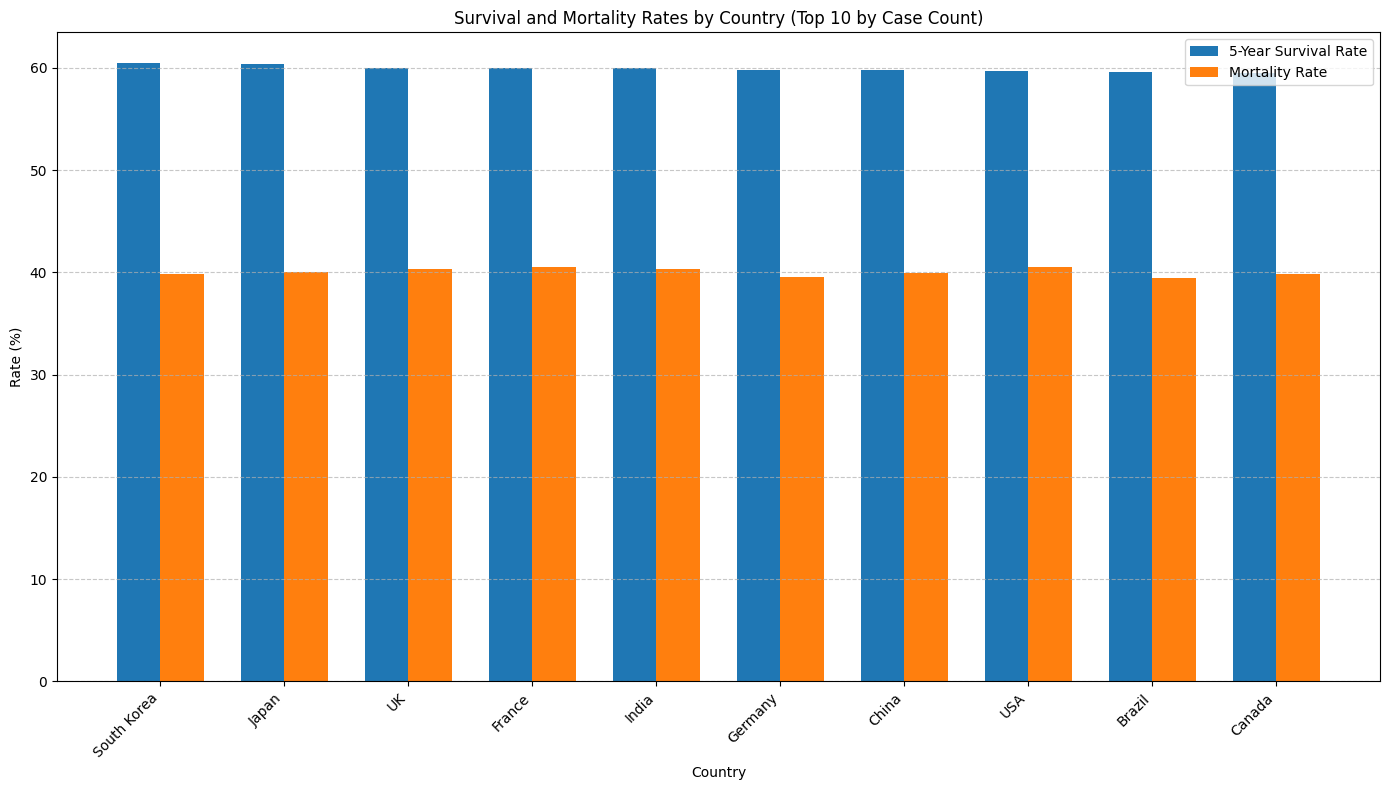

In [ ]:
# Let's examine relationships between risk factors and survival
risk_factors = ['Family_History', 'Smoking_History', 'Alcohol_Consumption',
                'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes',
                'Inflammatory_Bowel_Disease', 'Genetic_Mutation']

# Function to create a relationship plot
def plot_risk_survival_relationship(dataframe, risk_factors):
    plt.figure(figsize=(20, 15))

    for i, factor in enumerate(risk_factors, 1):
        plt.subplot(3, 3, i)

        # Create a crosstab of the risk factor and survival
        crosstab = pd.crosstab(dataframe[factor], dataframe['Survival_5_years'],
                             normalize='index') * 100

        # Plot the percentage of survival for each category of the risk factor
        crosstab['Yes'].sort_values().plot(kind='barh', color='green')

        plt.title(f'5-Year Survival Rate by {factor}')
        plt.xlabel('Survival Rate (%)')
        plt.ylabel(factor)
        plt.xlim(0, 100)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Plot the relationship between risk factors and survival
plot_risk_survival_relationship(df, risk_factors)

# Let's examine early detection and screening impact
detection_factors = ['Early_Detection', 'Screening_History']

plt.figure(figsize=(15, 6))
for i, factor in enumerate(detection_factors, 1):
    plt.subplot(1, 2, i)

    crosstab = pd.crosstab(df[factor], df['Survival_5_years'],
                          normalize='index') * 100

    crosstab['Yes'].sort_values().plot(kind='barh', color='blue')

    plt.title(f'5-Year Survival Rate by {factor}')
    plt.xlabel('Survival Rate (%)')
    plt.ylabel(factor)
    plt.xlim(0, 100)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Let's look at geographic patterns
plt.figure(figsize=(15, 8))
# Get top 10 countries by number of cases
top_countries = df['Country'].value_counts().nlargest(10).index.tolist()
country_survival = pd.DataFrame()

for country in top_countries:
    country_data = df[df['Country'] == country]
    survival_rate = (country_data['Survival_5_years'] == 'Yes').mean() * 100
    mortality_rate = (country_data['Mortality'] == 'Yes').mean() * 100

    country_survival = pd.concat([country_survival, pd.DataFrame({
        'Country': [country],
        'Survival_Rate': [survival_rate],
        'Mortality_Rate': [mortality_rate]
    })])

# Sort by survival rate
country_survival = country_survival.sort_values('Survival_Rate', ascending=False)

# Create a grouped bar chart
x = np.arange(len(country_survival))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
ax.bar(x - width/2, country_survival['Survival_Rate'], width, label='5-Year Survival Rate')
ax.bar(x + width/2, country_survival['Mortality_Rate'], width, label='Mortality Rate')

ax.set_title('Survival and Mortality Rates by Country (Top 10 by Case Count)')
ax.set_xlabel('Country')
ax.set_ylabel('Rate (%)')
ax.set_xticks(x)
ax.set_xticklabels(country_survival['Country'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
#Drop Patient_ID (not useful for prediction)
df.drop(columns=['Patient_ID'], inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store for inverse transform if needed

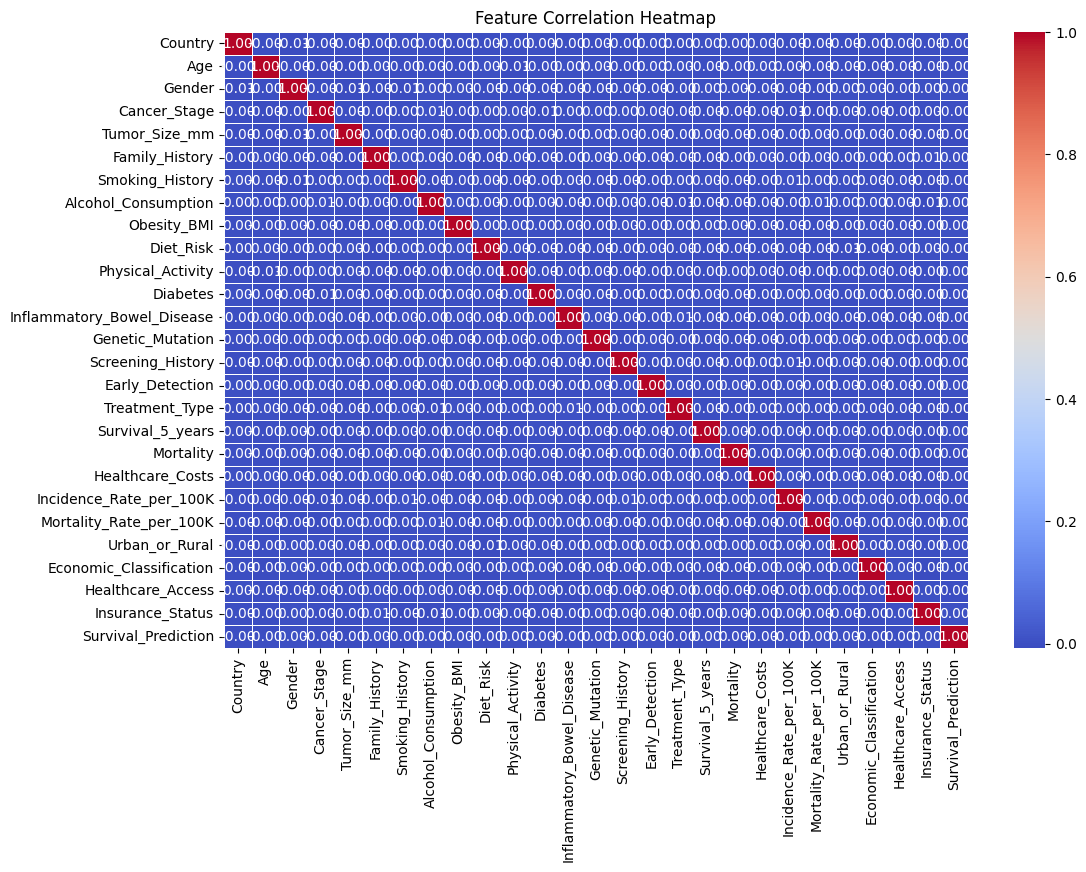

In [ ]:



corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:


# Define Features (X) and Target (y)
X = df.drop(columns=['Survival_Prediction'])  # Features
y = df['Survival_Prediction']  # Target

# Normalize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (133997, 26)
Testing set size: (33500, 26)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier


In [ ]:
# Define models with better hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
}

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    results[name] = accuracy  # Store accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.6060
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13199
           1       0.61      1.00      0.75     20301

    accuracy                           0.61     33500
   macro avg       0.30      0.50      0.38     33500
weighted avg       0.37      0.61      0.46     33500

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.6060
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13199
           1       0.61      1.00      0.75     20301

    accuracy                           0.61     33500
   macro avg       0.30      0.50      0.38     33500
weighted avg       0.37      0.61      0.46     33500

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Plot model performance
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate tuned model
y_pred = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
